<a href="https://colab.research.google.com/github/Saish31/SupplyChain_Risk_Assessment/blob/master/AI_SupplyChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>AI in Supply Chain Risk Assessment</h1>

Objective:
Develop a machine learning-based risk assessment system for supply chains that predicts disruptions, classifies risk factors, and suggests mitigation strategies to enhance resilience.

<h2>Importing Dataset</h2>

In [ ]:
import pandas as pd
df=pd.read_csv('dataset.csv')

In [ ]:
df.head()

,Supplier_ID,Supplier_Name,Region,Industry,On_Time_Delivery_Rate,Financial_Stability_Score,Disruption_Type,Severity,Time_To_Recovery_Days,Disruption_Cost_USD,Insurance_Coverage_Percentage,Penalty_Cost_USD,Compensation_Paid_USD
0,f2eb45c7-864a-43e8-a4fb-e6ca7fad2149,Brooks-Watson,Sweden,Food & Beverage,87.67,99,Raw Material Shortage,Low,7,23918.64,75.04,2451.31,5970.09
1,f6562957-12fc-43f2-94b6-ab8cfaaf9d09,Knight-Dyer,Hong Kong,Pharmaceuticals,87.82,12,Port Congestion,Low,12,24581.79,88.45,2242.07,2839.20
2,a337eb0b-e082-461f-b51e-8ad999a727d8,"Jacobson, Garcia and French",Rwanda,Electronics,93.34,12,Logistics Delay,Low,25,33468.14,71.56,4910.74,9518.34
3,33bddabf-a9b5-4ded-8694-ca4a0e0f47e9,Moore Ltd,Guam,Food & Beverage,65.17,79,Port Congestion,Low,24,42019.18,84.95,5144.62,6323.89
4,51764fa3-d229-4dc1-a33f-1fcc92621e0f,"Pope, Reyes and Guerra",Trinidad and Tobago,Retail,91.80,31,Cyber Attack,High,162,2872833.04,68.88,446598.66,894025.64


*   Web scraping techniques were used to gather recent disruption cases from sources like Reuters, SupplyChainBrain, and global trade news websites.
*   To ensure a balanced dataset, SMOTE (Synthetic Minority Over-sampling Technique) was applied. This helped generate additional data points for underrepresented disruption types, ensuring that all risk categories had enough samples for meaningful analysis.
*   Here’s what each of these columns represents:

  *   On_Time_Delivery_Rate (%) → The percentage of orders a supplier delivers on time. A higher value means the supplier is reliable, while a lower value indicates frequent delays.
  *   Financial_Stability_Score → A score from 0 to 100 indicating a supplier's financial health. A higher score means the supplier is financially strong, while a lower score suggests a risk of bankruptcy or disruptions.
  *   Severity → The level of impact caused by a disruption. It is categorized as Low, Medium, or High, where High severity disruptions have greater financial and operational consequences.
  The dataset uses predefined thresholds for classification:
    <ul>
    <li>Low Severity: Minimal financial loss (<$50,000) and recovery within a week.</li>
    <li>Medium Severity: Moderate financial impact ($50,000–$500,000) with recovery in weeks to a few months.</li>
    <li>High Severity: Major disruptions costing >$500,000 and requiring several months to recover.</li>
    </ul>
  *   Time_To_Recovery_Days → The estimated number of days required to recover from a disruption. Higher values indicate longer recovery times, often seen in severe disruptions like natural disasters or bankruptcies.
  *   Disruption Cost (USD) – Estimated financial loss due to a disruption (higher for high-severity events).
  *   Insurance Coverage (%) – Percentage of disruption cost covered by insurance.
  *   Penalty Cost (USD) – Extra cost due to late deliveries or non-compliance with contracts.
  *   Compensation Paid (USD) – If the supplier had to compensate clients due to a major issue.












In [ ]:
df.isna().sum()

,0
Supplier_ID,0
Supplier_Name,0
Region,0
Industry,0
On_Time_Delivery_Rate,0
Financial_Stability_Score,0
Disruption_Type,0
Severity,0
Time_To_Recovery_Days,0
Disruption_Cost_USD,0


We see that the dataset doesn't have any missing values. Hence, we can proceed.

<h2>Data Preprocessing</h2>

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: One-Hot Encoding for categorical columns
ohe_cols = ['Disruption_Type', 'Region']
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

In [ ]:
# Step 2: Label Encoding for Severity
le = LabelEncoder()
df['Severity'] = le.fit_transform(df['Severity'])  # Low -> 0, Medium -> 1, High -> 2

In [ ]:
# Step 3: MinMax Scaling
scaler = MinMaxScaler()
numerical_cols = ['On_Time_Delivery_Rate', 'Financial_Stability_Score',
                   'Penalty_Cost_USD','Disruption_Cost_USD', 'Compensation_Paid_USD', 'Insurance_Coverage_Percentage', 'Time_To_Recovery_Days']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.drop(['Supplier_ID'],axis=1,inplace=True)
df.drop(['Supplier_Name'],axis=1,inplace=True)
df.drop(['Industry'],axis=1,inplace=True)

In [ ]:
# Step 4: Train-Test Split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Severity'])

In [ ]:
train_df.head()

,On_Time_Delivery_Rate,Financial_Stability_Score,Severity,Time_To_Recovery_Days,Disruption_Cost_USD,Insurance_Coverage_Percentage,Penalty_Cost_USD,Compensation_Paid_USD,Disruption_Type_Labor Strike,Disruption_Type_Logistics Delay,...,Region_Uruguay,Region_Uzbekistan,Region_Vanuatu,Region_Venezuela,Region_Vietnam,Region_Wallis and Futuna,Region_Western Sahara,Region_Yemen,Region_Zambia,Region_Zimbabwe
656,0.618387,0.28,1,0.134078,0.002715,0.558303,0.003129,0.002111,False,True,...,False,False,False,False,False,False,False,False,False,False
19,0.353107,0.37,1,0.145251,0.000294,0.000000,0.001188,0.002329,False,False,...,False,False,False,False,True,False,False,False,False,False
33,0.996662,0.74,1,0.106145,0.006566,0.127061,0.006990,0.007577,False,False,...,False,False,False,False,False,False,False,False,False,False
553,0.347201,0.28,1,0.027933,0.002145,0.674708,0.002404,0.001367,False,False,...,False,False,False,False,False,False,False,False,False,False
615,0.092707,0.69,2,0.106145,0.059238,0.519501,0.044282,0.029805,False,True,...,False,False,False,False,False,False,False,False,False,False


<h2>Linear Regression</h2>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define target variables for regression
regression_targets = ['Penalty_Cost_USD', 'Compensation_Paid_USD', 'Disruption_Cost_USD', 'Time_To_Recovery_Days']
results = {}

for target in regression_targets:
    # Prepare data
    X_train = train_df.drop(columns=regression_targets)
    y_train = train_df[target]
    X_test = test_df.drop(columns=regression_targets)
    y_test = test_df[target]

    # Train Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate Model
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[target] = {'RMSE': rmse, 'R2 Score': r2}

    print(f"{target} - RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")

Penalty_Cost_USD - RMSE: 0.1634, R2 Score: -0.1001
Compensation_Paid_USD - RMSE: 0.1709, R2 Score: -0.5562
Disruption_Cost_USD - RMSE: 0.2354, R2 Score: -0.0343
Time_To_Recovery_Days - RMSE: 0.3534, R2 Score: -0.5211




*   RMSE (Root Mean Squared Error)
  *   RMSE represents the average error in the same scale as the target variable.
Since we applied MinMax scaling (0-1), the RMSE values tell us how far the predictions deviate from the actual values within the scaled range.
  *   An RMSE of 0.1634 (for Penalty Cost) means the model's typical prediction error is about 16.34% of the scaled range, which is moderate but not great.
  *   Time_To_Recovery_Days has the worst RMSE at 0.3534, meaning the model's predictions are off by ~35% on average.

*   R² (Coefficient of Determination)
  *   R² measures how well the model explains variance in the target variable.
R² < 0 means the model is worse than just predicting the mean for every instance.
Ideally, R² should be closer to 1 for a good model.
  *   Compensation_Paid_USD (R² = -0.5562) → The worst-performing model; it's not capturing useful patterns.
  *   Penalty_Cost_USD (R² = -0.1001) → The least bad, but still not reliable.

<hr>
<big>Why is Linear Regression Performing Poorly?</big>



*   Non-Linearity in Data:

  *   Supply chain disruptions often have non-linear relationships (e.g., a minor delay might have low cost, but a major delay could lead to exponentially higher penalties).

  *   Linear Regression assumes a straight-line relationship, which may not be true for this dataset.

*   Feature Interactions Not Captured:
  *   Some factors likely influence each other (e.g., Financial_Stability_Score * On_Time_Delivery_Rate may jointly impact costs).

  *   Linear Regression cannot automatically detect such interactions.

<h2>Decision Tree Regression</h2>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define target variables for regression
regression_targets = ['Penalty_Cost_USD', 'Compensation_Paid_USD', 'Disruption_Cost_USD', 'Time_To_Recovery_Days']
results = {}

for target in regression_targets:
    # Prepare data
    X_train = train_df.drop(columns=regression_targets)
    y_train = train_df[target]
    X_test = test_df.drop(columns=regression_targets)
    y_test = test_df[target]

    # Train Decision Tree Regressor Model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate Model
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[target] = {'RMSE': rmse, 'R2 Score': r2}

    print(f"{target} - RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")



Penalty_Cost_USD - RMSE: 0.1382, R2 Score: 0.2134
Compensation_Paid_USD - RMSE: 0.1056, R2 Score: 0.4063
Disruption_Cost_USD - RMSE: 0.1764, R2 Score: 0.4194
Time_To_Recovery_Days - RMSE: 0.2859, R2 Score: 0.0041


*   Penalty_Cost_USD

  *   The model has improved over Linear Regression (which had R² = -0.1001), meaning it's capturing more patterns in the data.
  *   However, an R² of 0.2134 suggests that the model explains only ~21% of the variance, which is still quite low.


*   Compensation_Paid_USD

  *   This is the best-performing model so far, with 40.63% variance explained.

  *   The RMSE is also the lowest among all target variables, indicating better predictions.

*   Disruption_Cost_USD

  *   This model performs slightly better than for Compensation_Paid_USD, explaining 41.94% of the variance.
  *   Decision Trees seem to be capturing patterns in Disruption Cost better than Linear Regression.


*   Time_To_Recovery_Days
  *   The R² score is nearly 0, meaning the model is barely better than predicting the mean of the data.
  *   The high RMSE suggests that Decision Trees are not effectively capturing patterns in this variable.



<h2>XGBoost</h2>

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define target variables for regression
regression_targets = ['Penalty_Cost_USD', 'Compensation_Paid_USD', 'Disruption_Cost_USD', 'Time_To_Recovery_Days']
results = {}

for target in regression_targets:
    # Prepare data
    X_train = train_df.drop(columns=regression_targets)
    y_train = train_df[target]
    X_test = test_df.drop(columns=regression_targets)
    y_test = test_df[target]

    # Train XGBoost Regressor
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate Model
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[target] = {'RMSE': rmse, 'R2 Score': r2}

    print(f"{target} - RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")

Penalty_Cost_USD - RMSE: 0.1025, R2 Score: 0.5669
Compensation_Paid_USD - RMSE: 0.0874, R2 Score: 0.5933
Disruption_Cost_USD - RMSE: 0.1380, R2 Score: 0.6448
Time_To_Recovery_Days - RMSE: 0.2191, R2 Score: 0.4153




*   Compared to Decision Tree and Linear Regression, XGBoost performed significantly better in terms of R² score across all target variables.
*   RMSE values are lower than previous models, indicating that XGBoost produces more accurate predictions.



<h2>Random Forest Regression</h2>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define target variables for regression
regression_targets = ['Penalty_Cost_USD', 'Compensation_Paid_USD', 'Disruption_Cost_USD', 'Time_To_Recovery_Days']
results = {}

for target in regression_targets:
    # Prepare data
    X_train = train_df.drop(columns=regression_targets)
    y_train = train_df[target]
    X_test = test_df.drop(columns=regression_targets)
    y_test = test_df[target]

    # Train Random Forest Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate Model
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[target] = {'RMSE': rmse, 'R2 Score': r2}

    print(f"{target} - RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")


Penalty_Cost_USD - RMSE: 0.0990, R2 Score: 0.5960
Compensation_Paid_USD - RMSE: 0.0819, R2 Score: 0.6424
Disruption_Cost_USD - RMSE: 0.1343, R2 Score: 0.6632
Time_To_Recovery_Days - RMSE: 0.2243, R2 Score: 0.3870


Overall Observation:

Both Random Forest and XGBoost perform significantly better than Linear and Decision Tree regression models. However, XGBoost still has a slight edge in terms of performance, especially for predicting Time_To_Recovery_Days.
<hr>
<big>Conclusion:</big>


*   Use Random Forest for general monetary predictions (Penalty, Compensation, Disruption Costs).
*   Use XGBoost if predicting Time_To_Recovery_Days is the priority.



<h2>Hyperparameter Tuning</h2>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define targets
regression_targets = ['Penalty_Cost_USD', 'Compensation_Paid_USD', 'Disruption_Cost_USD', 'Time_To_Recovery_Days']
rf_results = {}
xgb_results = {}

# Define parameter grids
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
}

In [ ]:
# Loop through each target and tune both models
for target in regression_targets:
    print(f"\n================== Tuning for Target: {target} ==================\n")

    # Prepare data
    X_train = train_df.drop(columns=regression_targets)
    y_train = train_df[target]
    X_test = test_df.drop(columns=regression_targets)
    y_test = test_df[target]

    # --- Random Forest Tuning ---
    rf = RandomForestRegressor(random_state=42)
    rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
    rf_grid.fit(X_train, y_train)
    best_rf = rf_grid.best_estimator_
    rf_preds = best_rf.predict(X_test)
    rf_rmse = mean_squared_error(y_test, rf_preds) ** 0.5
    rf_r2 = r2_score(y_test, rf_preds)
    rf_results[target] = {
        'Best Params': rf_grid.best_params_,
        'RMSE': rf_rmse,
        'R2 Score': rf_r2
    }

    print(f"[Random Forest] Best Params: {rf_grid.best_params_}")
    print(f"[Random Forest] RMSE: {rf_rmse:.4f}, R2 Score: {rf_r2:.4f}\n")

    # --- XGBoost Tuning ---
    xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
    xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
    xgb_grid.fit(X_train, y_train)
    best_xgb = xgb_grid.best_estimator_
    xgb_preds = best_xgb.predict(X_test)
    xgb_rmse = mean_squared_error(y_test, xgb_preds) ** 0.5
    xgb_r2 = r2_score(y_test, xgb_preds)
    xgb_results[target] = {
        'Best Params': xgb_grid.best_params_,
        'RMSE': xgb_rmse,
        'R2 Score': xgb_r2
    }

    print(f"[XGBoost] Best Params: {xgb_grid.best_params_}")
    print(f"[XGBoost] RMSE: {xgb_rmse:.4f}, R2 Score: {xgb_r2:.4f}")


================== Tuning for Target: Penalty_Cost_USD ==================

[Random Forest] Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
[Random Forest] RMSE: 0.0984, R2 Score: 0.6014

[XGBoost] Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
[XGBoost] RMSE: 0.1012, R2 Score: 0.5781

================== Tuning for Target: Compensation_Paid_USD ==================

[Random Forest] Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
[Random Forest] RMSE: 0.0788, R2 Score: 0.6688

[XGBoost] Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
[XGBoost] RMSE: 0.0838, R2 Score: 0.6255

================== Tuning for Target: Disruption_Cost_USD ==================

[Random Forest] Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
[Random Forest] RMSE: 0.1318, R2 Scor

<big>Based on the results after hyperparameter tuning using GridSearchCV: </big>
*   Use Random Forest for monetary predictions involving Penalty and Compensation.
*   Use XGBoost for predicting Disruption Costs and Time to Recovery, where slight improvements in performance can have operational impact.

<h1>SHAP implementation</h1>

In [ ]:
import shap
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

<h4>Disruption_Cost_USD</h4>

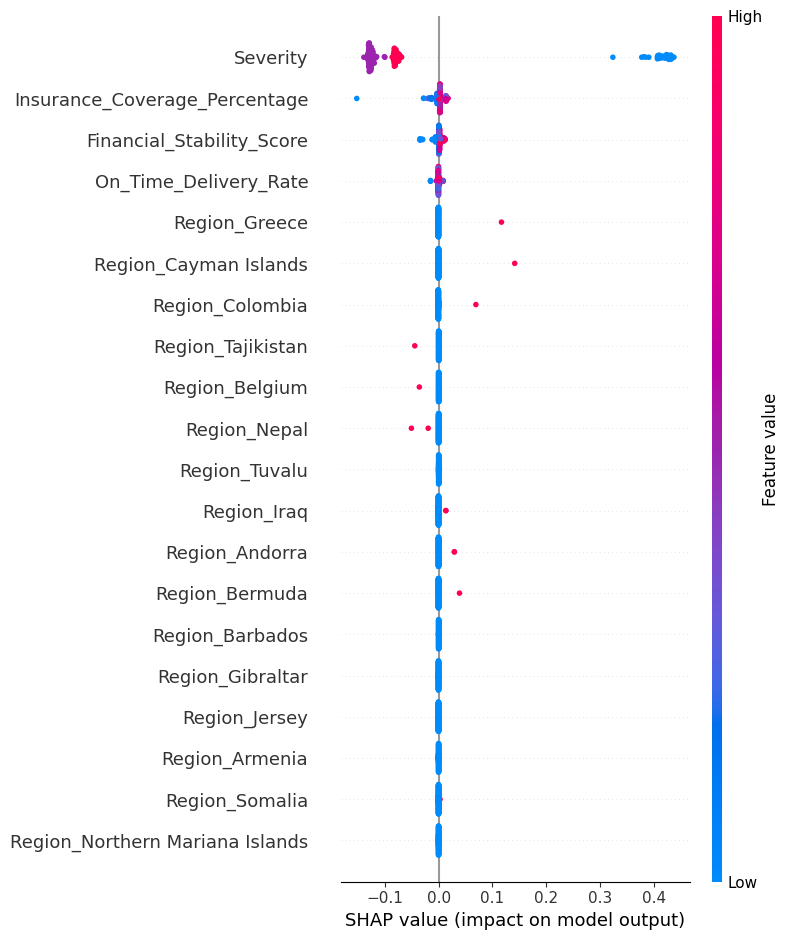

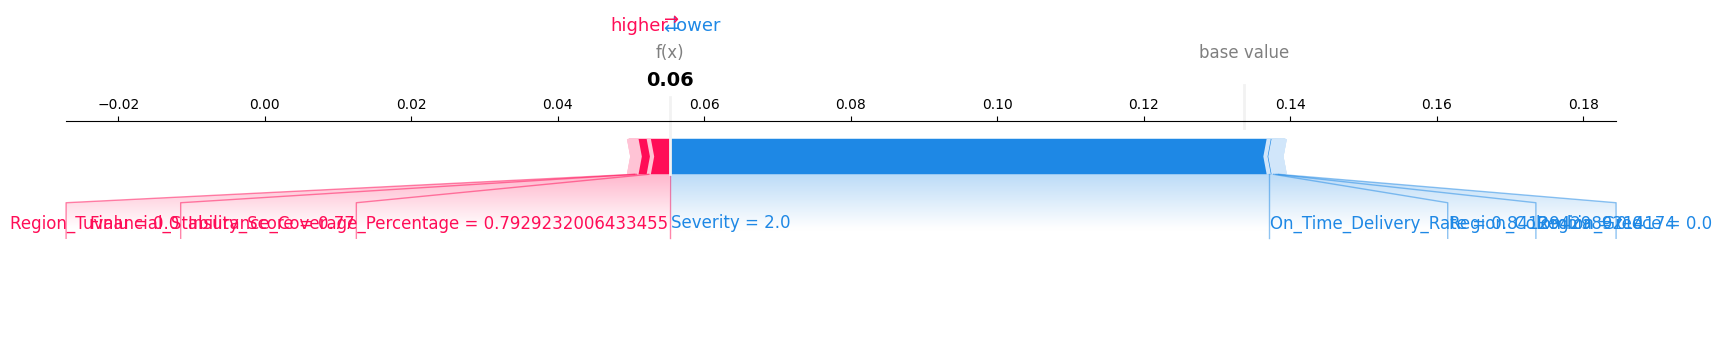

In [ ]:
# 1. Re-train XGBoost on Disruption_Cost_USD using your best params
best_params_disruption = {
    "learning_rate": 0.05,
    "max_depth": 3,
    "n_estimators": 100,
    "subsample": 1.0
}

# Prepare data
X_train = train_df.drop(columns=regression_targets)
y_train = train_df["Disruption_Cost_USD"]
X_test  = test_df.drop(columns=regression_targets)
y_test  = test_df["Disruption_Cost_USD"]

# Fit model
xgb_disruption = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    **best_params_disruption
)
xgb_disruption.fit(X_train, y_train)

# 2. Create SHAP explainer & compute SHAP values
explainer = shap.TreeExplainer(xgb_disruption)
shap_values = explainer.shap_values(X_test)

# 3. Global explanation: summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.tight_layout()
plt.show()

# 4. Local explanation: force plot for the first test instance
idx = 0  # you can change this to any row index in X_test
shap.initjs()  # for interactive JS plots in notebooks
force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_test.iloc[idx],
    matplotlib=True
)

*   Severity is the most influential feature. Higher severity (shown in red) increases disruption cost significantly.
*   Insurance_Coverage_Percentage and Financial_Stability_Score also impact the prediction, where lower values (in blue) tend to push the disruption cost higher.
*   On_Time_Delivery_Rate has a moderate impact — lower delivery rates slightly increase the predicted cost.
*   Certain Region features (like Greece, Cayman Islands, Colombia, etc.) have minor but visible effects, indicating some geographical influence.



<h4>Time_To_Recovery_Days </h4>

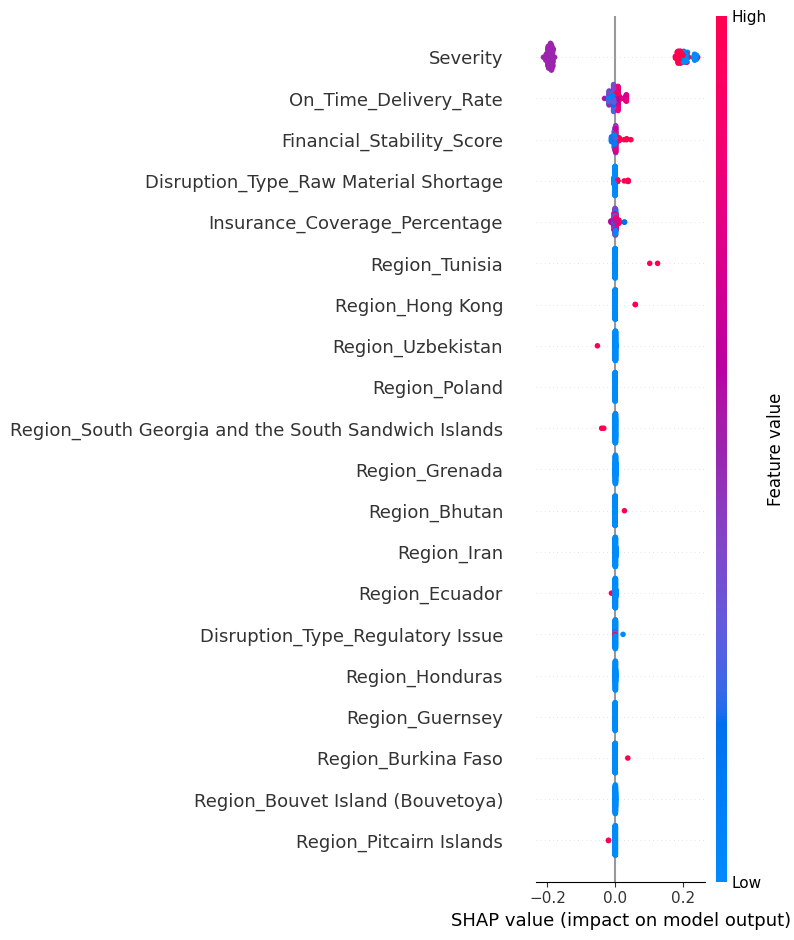

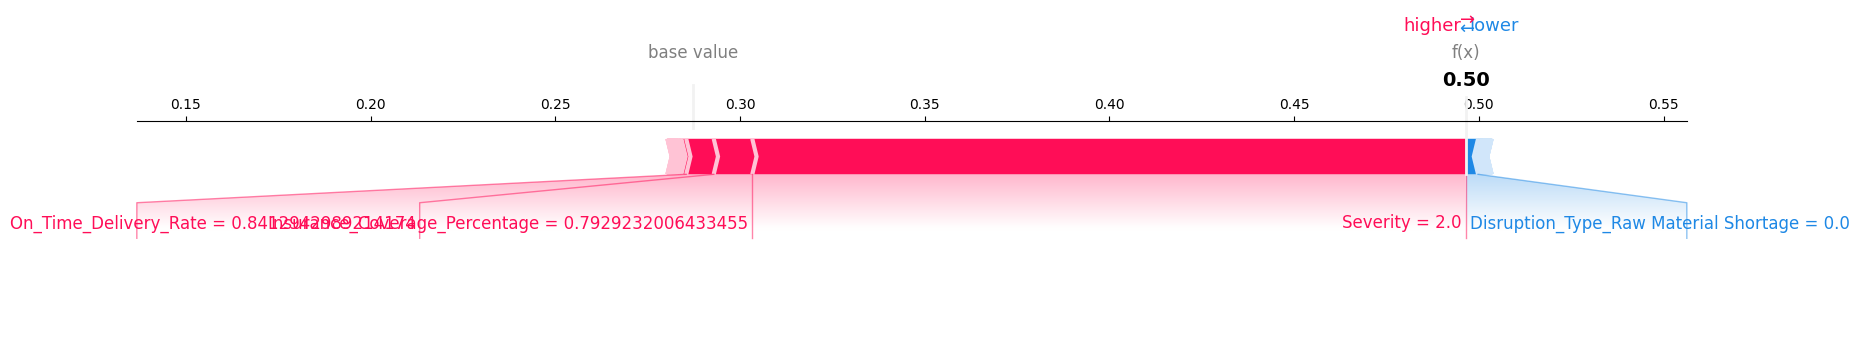

In [ ]:
# 1. Re-train XGBoost on Time_To_Recovery_Days using your best params
best_params_disruption = {
    "learning_rate": 0.05,
    "max_depth": 3,
    "n_estimators": 100,
    "subsample": 1.0
}

# Prepare data
X_train = train_df.drop(columns=regression_targets)
y_train = train_df["Time_To_Recovery_Days"]
X_test  = test_df.drop(columns=regression_targets)
y_test  = test_df["Time_To_Recovery_Days"]

# Fit model
xgb_disruption = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    **best_params_disruption
)
xgb_disruption.fit(X_train, y_train)

# 2. Create SHAP explainer & compute SHAP values
explainer = shap.TreeExplainer(xgb_disruption)
shap_values = explainer.shap_values(X_test)

# 3. Global explanation: summary plot
plt.figure(figsize=(100, 60))
shap.summary_plot(shap_values, X_test, show=False)
plt.tight_layout()
plt.show()

# 4. Local explanation: force plot for the first test instance
idx = 0  # you can change this to any row index in X_test
shap.initjs()  # for interactive JS plots in notebooks
force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_test.iloc[idx],
    matplotlib=True
)

*   Severity again stands out as the most important factor — higher severity levels (in red) tend to increase the recovery time.
*   On_Time_Delivery_Rate and Financial_Stability_Score follow closely. Lower delivery rates and weaker financial scores push predictions toward longer recovery periods.
*   Disruption_Type_Raw Material Shortage has noticeable impact — presence of this disruption type tends to increase recovery time.
*   Insurance_Coverage_Percentage has a modest influence, where lower coverage slightly increases recovery days.
*   Several regional features (e.g., Tunisia, Hong Kong, Uzbekistan) show limited but present effects.

<h4>Penalty_Cost_USD</h4>

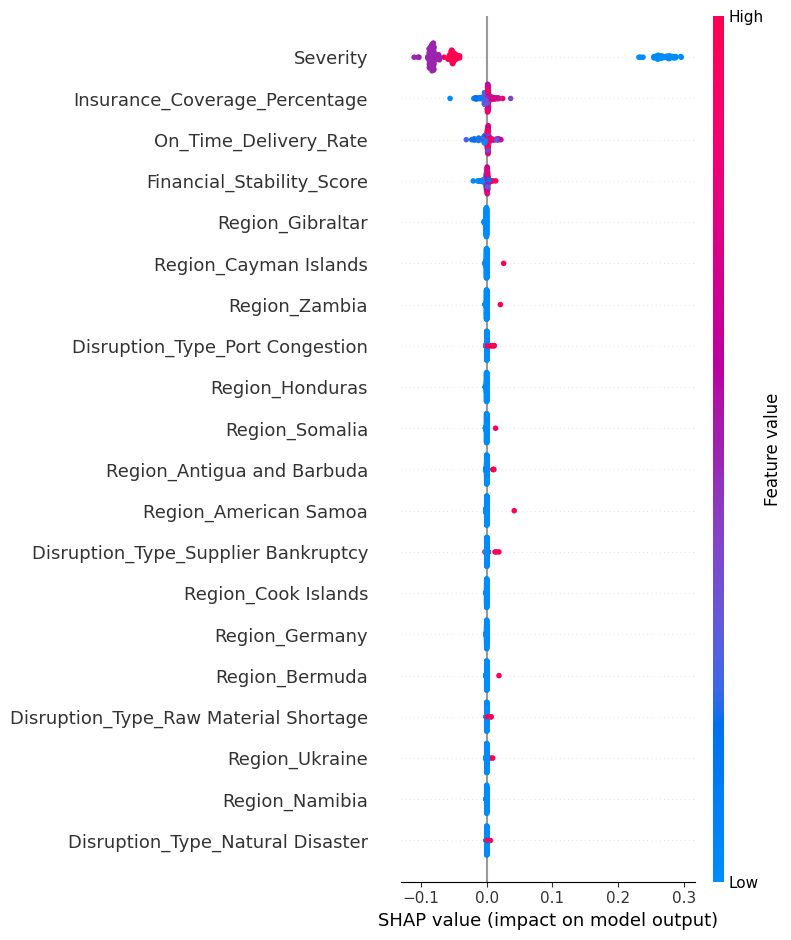

<Figure size 800x400 with 0 Axes>

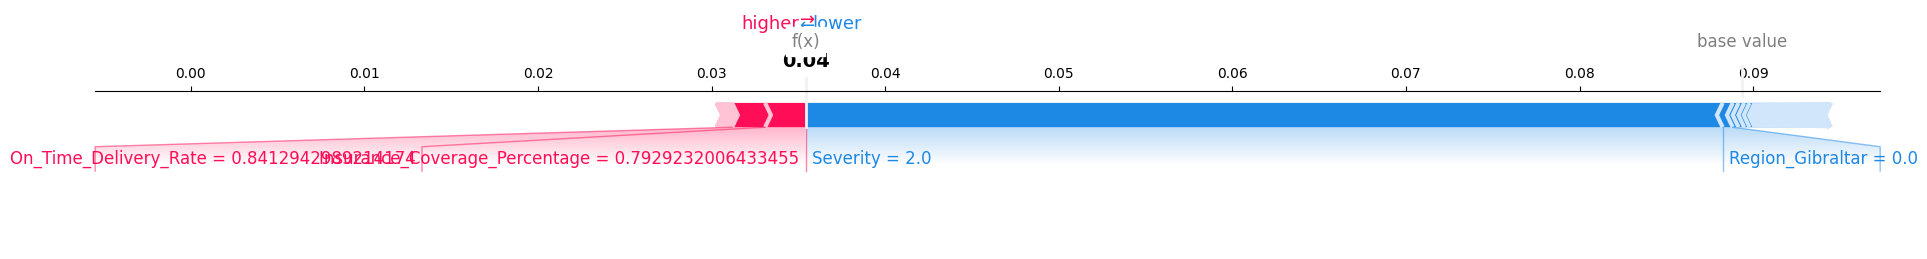

In [ ]:
# 1) Define best hyperparameters from tuning
best_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

# Prepare data
X_train = train_df.drop(columns=regression_targets)
y_train = train_df["Penalty_Cost_USD"]
X_test  = test_df.drop(columns=regression_targets)
y_test  = test_df["Penalty_Cost_USD"]

# Train Random Forest with tuned params
rf = RandomForestRegressor(random_state=42, **best_params)
rf.fit(X_train, y_train)

# 3) SHAP explainer & values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# 4) Global summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.tight_layout()
plt.show()

# 5) Local force plot for the first sample
shap.initjs()  # enables JS in notebooks; optional if using matplotlib=True
idx = 0
plt.figure(figsize=(8, 4))
shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_test.iloc[idx],
    matplotlib=True,
    show=False
)
plt.tight_layout()
plt.show()

*   Severity is again the dominant factor — high severity leads to higher penalty costs.
*   Insurance_Coverage_Percentage and On_Time_Delivery_Rate have strong influence too. Low insurance coverage and poor delivery rates push up penalties.
*   Financial_Stability_Score contributes as well — financially unstable suppliers tend to be associated with higher penalty risk.
*   Certain disruption types like Port Congestion and Supplier Bankruptcy also increase penalty likelihood.
*   The remaining features, including several regions and disruption types (e.g., Raw Material Shortage, Natural Disaster), show minor effects but are still worth noting in specific scenarios.

<h4>Compensation_Paid_USD</h4>

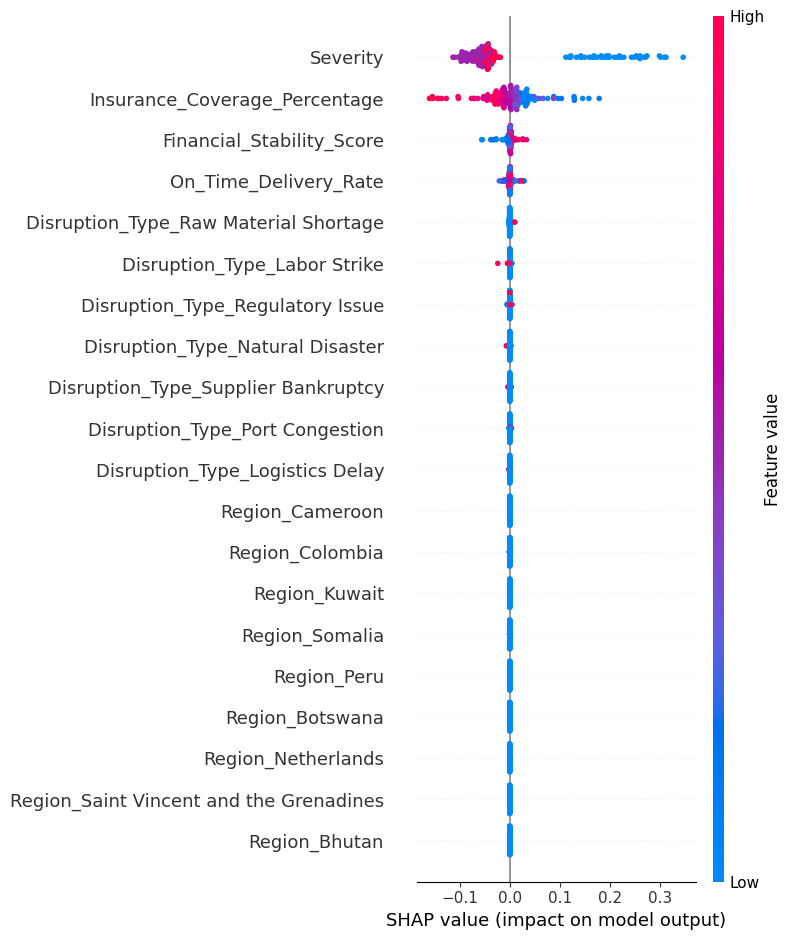

<Figure size 800x400 with 0 Axes>

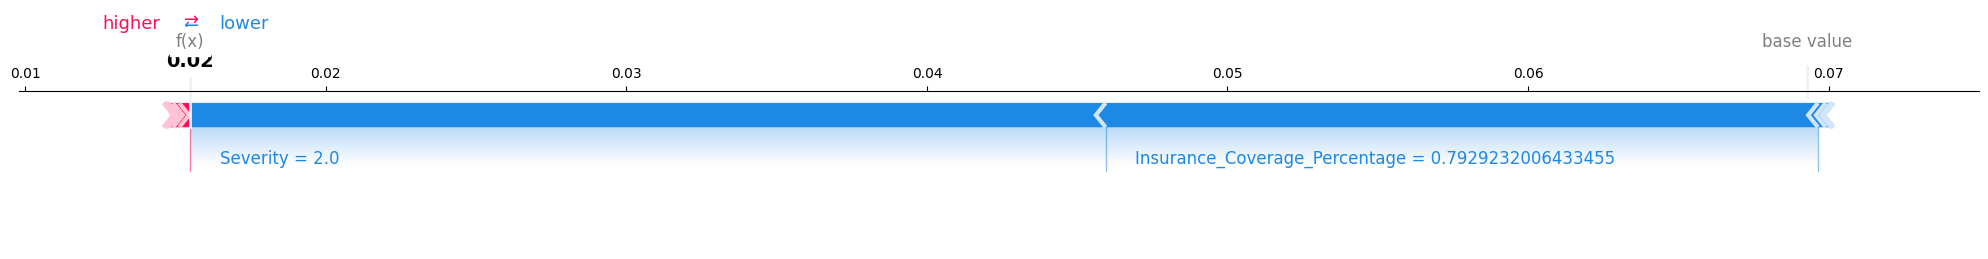

In [ ]:
# 1) Define best hyperparameters from tuning
best_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

# Prepare data
X_train = train_df.drop(columns=regression_targets)
y_train = train_df["Compensation_Paid_USD"]
X_test  = test_df.drop(columns=regression_targets)
y_test  = test_df["Compensation_Paid_USD"]

# Train Random Forest with tuned params
rf = RandomForestRegressor(random_state=42, **best_params)
rf.fit(X_train, y_train)

# 3) SHAP explainer & values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# 4) Global summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.tight_layout()
plt.show()

# 5) Local force plot for the first sample
shap.initjs()  # enables JS in notebooks; optional if using matplotlib=True
idx = 0
plt.figure(figsize=(8, 4))
shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_test.iloc[idx],
    matplotlib=True,
    show=False
)
plt.tight_layout()
plt.show()

*   Severity continues to be the top driver — higher severity levels are clearly linked to higher compensation costs.
*   Insurance_Coverage_Percentage is highly influential too — low coverage (in blue) leads to larger compensation liabilities.
*   Financial_Stability_Score and On_Time_Delivery_Rate show that poor financial health and unreliable delivery contribute to higher compensation.
*   Disruption types like Raw Material Shortage, Labor Strike, Natural Disaster, and Regulatory Issues all push compensation costs upward.
*   The geographic regions at the bottom of the chart contribute relatively little, indicating that disruption type and financial/operational metrics are more critical drivers.

